# The Movie Database API Exploration

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import datetime
import missingno as msno
import warnings

from config import API_Key

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 12
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# start page
PAGE = 1

url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=utf-8 -- Encoding: utf-8


In [4]:
# query first 500 pages
popular_movies = []

for PAGE in range(1, 501):
  url = url = f'https://api.themoviedb.org/3/movie/popular?api_key={API_Key}&language=en-US&page={PAGE}'
  r = requests.get(url)
  popular_movies.append(r.json())

# Movies Without Release Date

In [5]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [6]:
data = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df = pd.DataFrame(data=data)
df.head()

,page_number,adult,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,1,False,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777
1,2,False,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,Veneciafrenia,5.4,55
2,3,False,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,Dakota,6.0,7
3,4,False,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,Heatwave,7.4,30
4,5,False,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,What a Father!,8.4,74


In [7]:
# drop page number and adult columns
df.drop(columns=['page_number', 'adult'], inplace=True)
df

,id,original_language,popularity,poster_path,title,vote_average,vote_count
0,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777
1,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,Veneciafrenia,5.4,55
2,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,Dakota,6.0,7
3,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,Heatwave,7.4,30
4,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,What a Father!,8.4,74
...,...,...,...,...,...,...,...
495,100683,en,10.477,/9TY2u8VTjtMzzXNiDra9FXDGrn2.jpg,Dragon Eyes,5.1,124
496,10491,en,10.463,/7gBFkDYBqvSzrPOWlpGTXRp97NQ.jpg,Enigma,6.4,219
497,463288,en,10.447,/hbuZzy7Khp9GmABZT9WPTVT4fnx.jpg,Star vs. the Forces of Evil: The Battle for Mewni,8.5,85
498,605804,en,10.435,/yCBslw91HrA66w8fsMqhKMvtgff.jpg,The Wretched,6.0,424


In [8]:
df.shape

(500, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   original_language  500 non-null    object 
 2   popularity         500 non-null    float64
 3   poster_path        492 non-null    object 
 4   title              500 non-null    object 
 5   vote_average       500 non-null    float64
 6   vote_count         500 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 27.5+ KB


In [10]:
df['id'] = df['id'].astype('category')                  # convert id to categorical            
df['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: id
Non-Null Count  Dtype   
--------------  -----   
500 non-null    category
dtypes: category(1)
memory usage: 21.2 KB


In [11]:
pd.value_counts(df.dtypes)

object      3
float64     2
category    1
int64       1
dtype: int64

In [12]:
df.describe(exclude='number')

,id,original_language,poster_path,title
count,500,500,492,500
unique,500,21,492,499
top,65,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,Shaft
freq,1,382,1,2


In [13]:
df.describe(include='number')

,popularity,vote_average,vote_count
count,500.000000,500.000000,500.0000
mean,42.171578,6.141800,1354.9100
std,171.225537,1.653621,2389.4736
min,8.023000,0.000000,0.0000
25%,12.685000,5.800000,87.0000
50%,18.036500,6.400000,365.0000
75%,30.708250,7.000000,1448.2500
max,3521.980000,10.000000,15763.0000


In [14]:
# helper function to plot distributions
def plotkde(data, x):
  '''
  arguments

  data: dataframe
  x: column name

  '''
  return sns.kdeplot(data=data, x=x)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

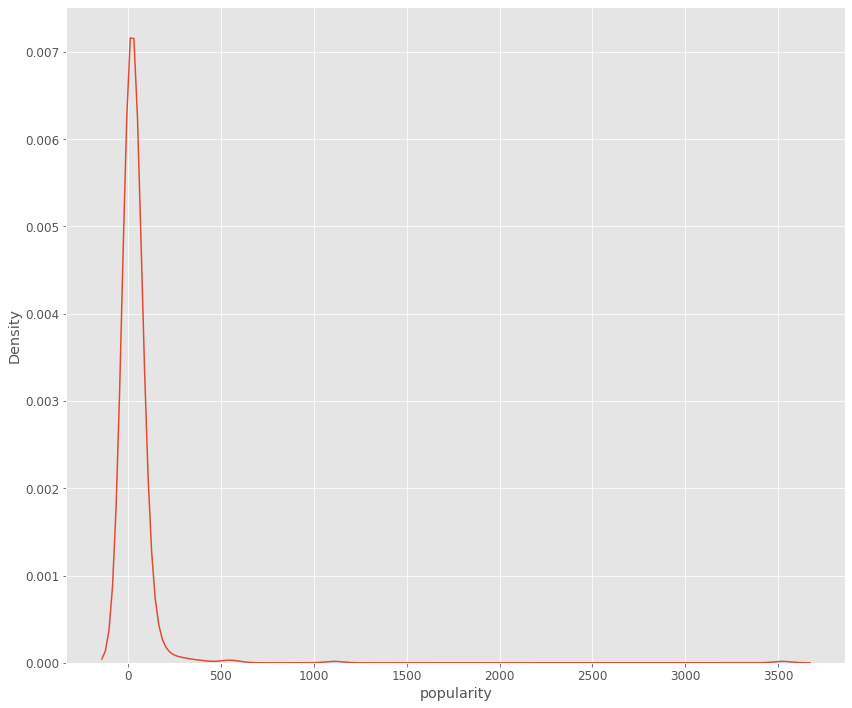

In [15]:
plotkde(data=df, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

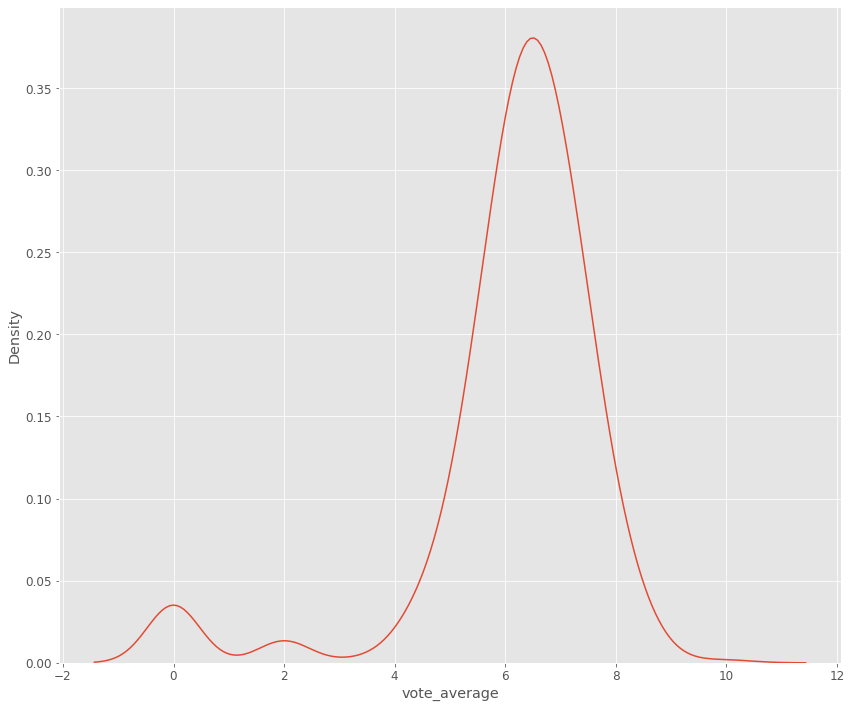

In [16]:
plotkde(data=df, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

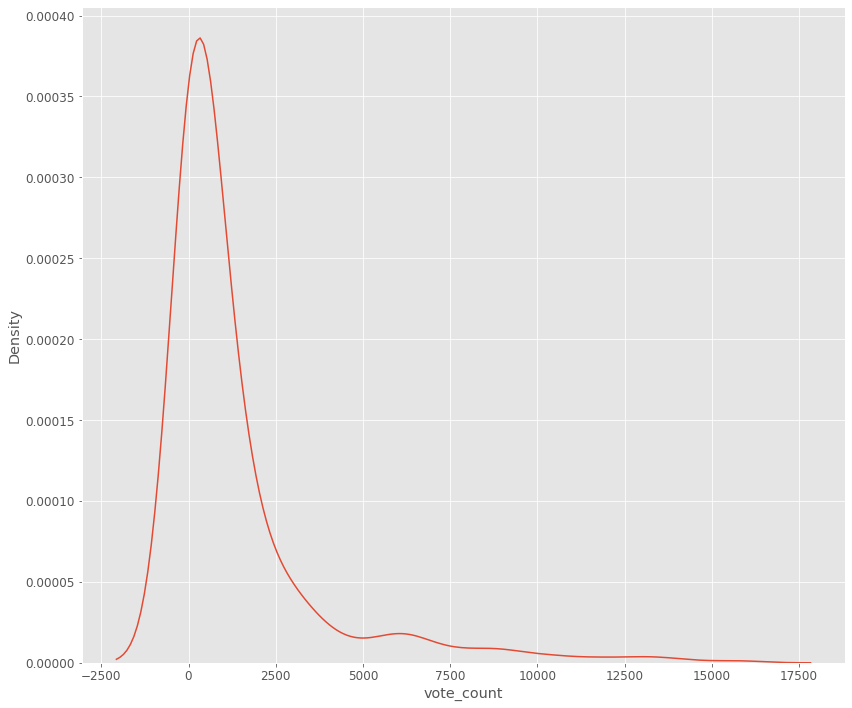

In [17]:
plotkde(data=df, x='vote_count')

# Missing Values Exploration

In [18]:
df.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          8
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

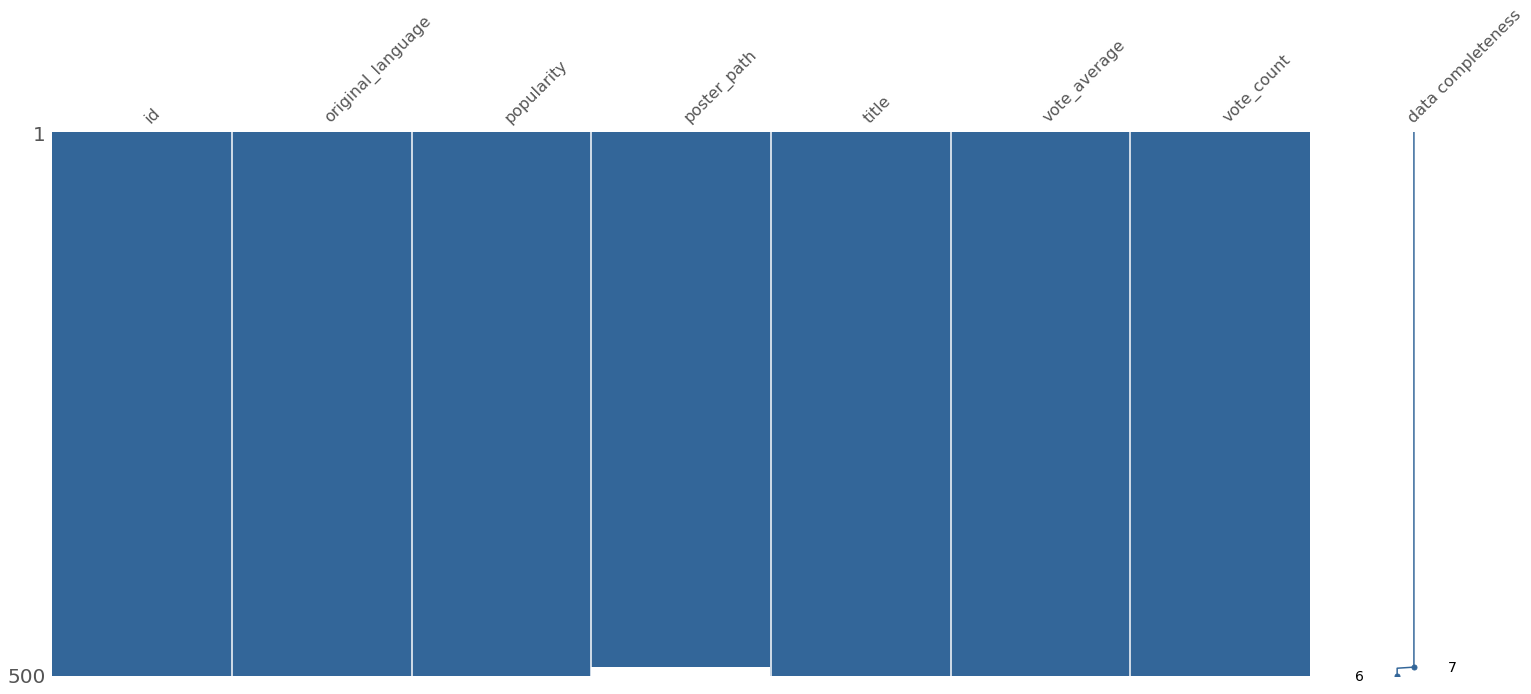

In [19]:
msno.matrix(df, labels=True, sort='descending', color=(0.2, 0.4, 0.6))

In [20]:
df.duplicated().sum()                                   # check for duplicates

0

In [21]:
df.loc[df.duplicated(subset=['id'])]                    # check where id is duplicated

,id,original_language,popularity,poster_path,title,vote_average,vote_count


[Text(0.5, 1.0, 'Count of unique original language')]

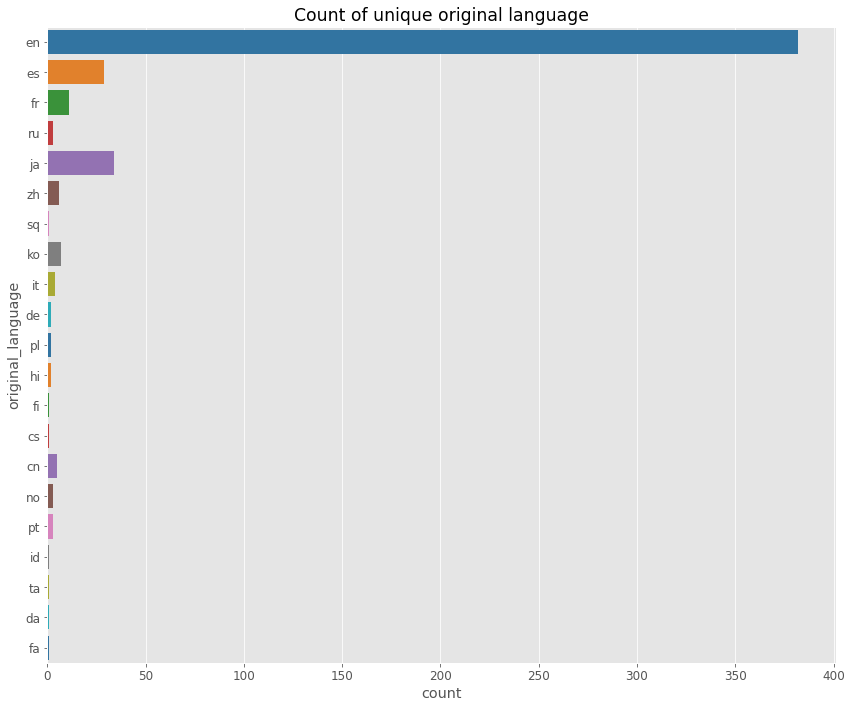

In [22]:
ax = sns.countplot(
  data=df, 
  y='original_language', palette='tab10',
)

ax.set(title='Count of unique original language')

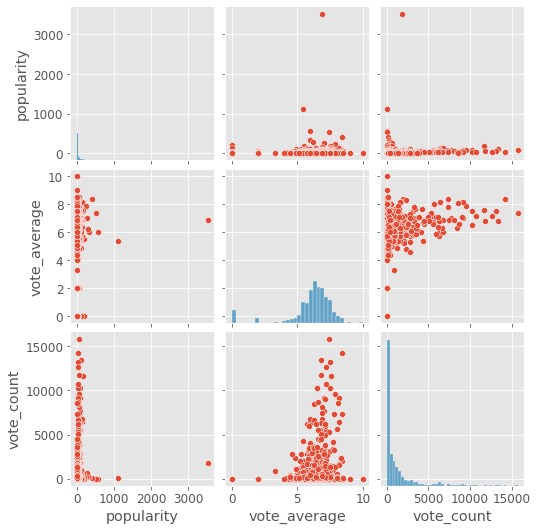

In [23]:
sns.pairplot(df)

In [24]:
df_corr = df[['popularity', 'vote_average', 'vote_count']].corr()
df_corr

,popularity,vote_average,vote_count
popularity,1.000000,0.029065,0.039109
vote_average,0.029065,1.000000,0.224662
vote_count,0.039109,0.224662,1.000000


<AxesSubplot:>

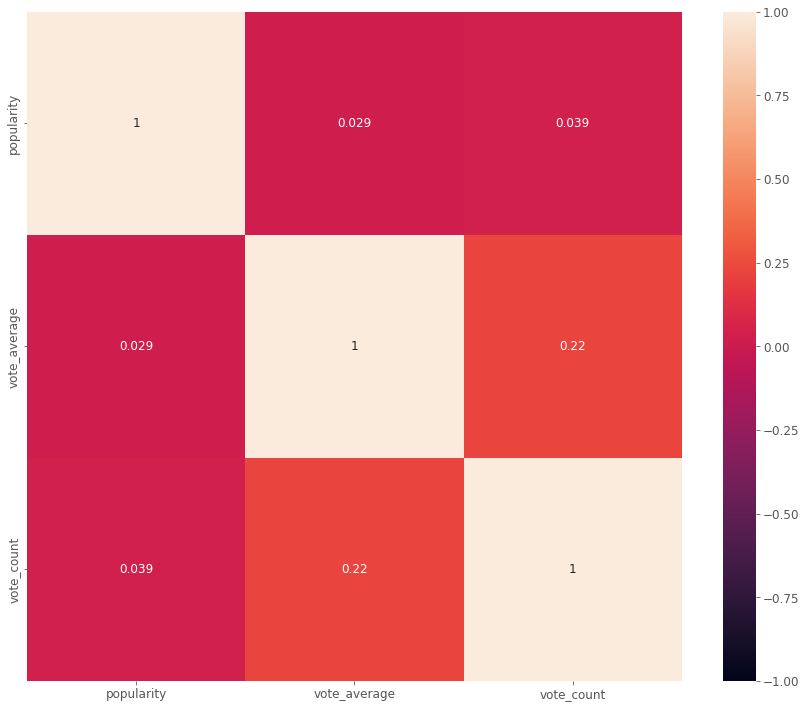

In [25]:
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1)

In [26]:
from matplotlib.ticker import FuncFormatter

# set y-axis formatter
def thousand(x, pos):
  return '%1.0fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.1f' % (x * 1)

format_orig = FuncFormatter(original)

# Top 20 Movies by Popularity 

In [27]:
df_by_pop = df[['title', 'popularity']] \
  .groupby('title')['popularity'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_by_pop

,sum
title,
Fantastic Beasts: The Secrets of Dumbledore,3521.980
Veneciafrenia,1110.247
Dakota,570.656
Heatwave,526.913
What a Father!,403.419
Restless,338.507
Chernobyl: Abyss,296.026
The House,269.408
Jujutsu Kaisen 0,244.693


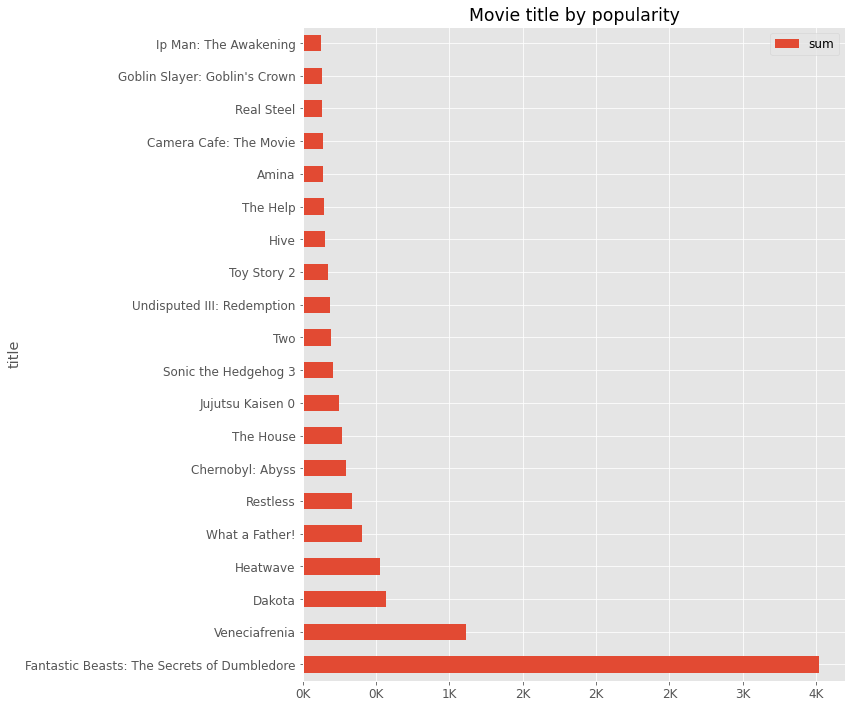

In [28]:
ax1 = df_by_pop.plot(
  kind='barh',
  grid=True,
  ylabel='title', title='Movie title by popularity'
)

ax1.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Count

In [29]:
df_vot_cnt = df[['title', 'vote_count']] \
  .groupby('title')['vote_count'] \
  .agg([np.sum]) \
  .sort_values(by='sum', ascending=False) \
  .head(20)

df_vot_cnt

,sum
title,
John Wick,15763
The Empire Strikes Back,14235
Venom,13396
Rogue One: A Star Wars Story,13192
Spider-Man 2,12668
Jumanji: Welcome to the Jungle,11768
Toy Story 2,11657
The Shape of Water,10668
A Star Is Born,10281


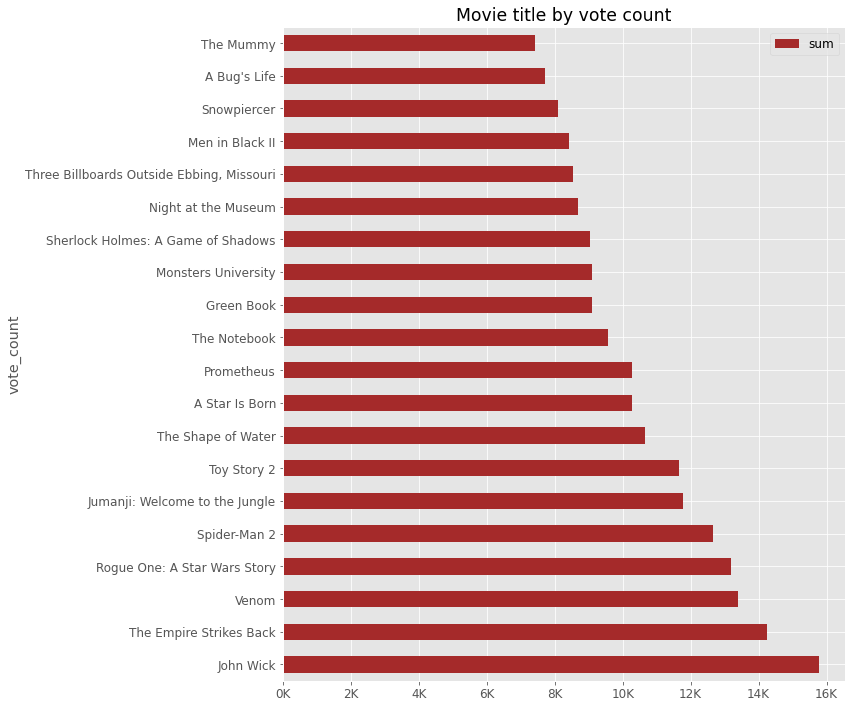

In [30]:
ax2 = df_vot_cnt.plot(
  kind='barh',
  grid=True,
  xlabel='vote_count', ylabel='title', title='Movie title by vote count',
  color='brown'
)

ax2.xaxis.set_major_formatter(thousand)

# Top 20 Movies by Vote Average

In [31]:
df_vot_avg = df[['title', 'vote_average']] \
  .groupby('title')['vote_average'] \
  .agg([np.mean]) \
  .sort_values(by='mean', ascending=False) \
  .head(20)

df_vot_avg

,mean
title,
God's Time,10.0
Michael Jackson: HIStory Tour - Live in Munich,9.0
Mushi-Shi: The Next Chapter - Drops of Bells,8.5
Star vs. the Forces of Evil: The Battle for Mewni,8.5
Demon Slayer: Kimetsu no Yaiba Sibling's Bond,8.5
Howl's Moving Castle,8.4
The Empire Strikes Back,8.4
What a Father!,8.4
Sunset Boulevard,8.4


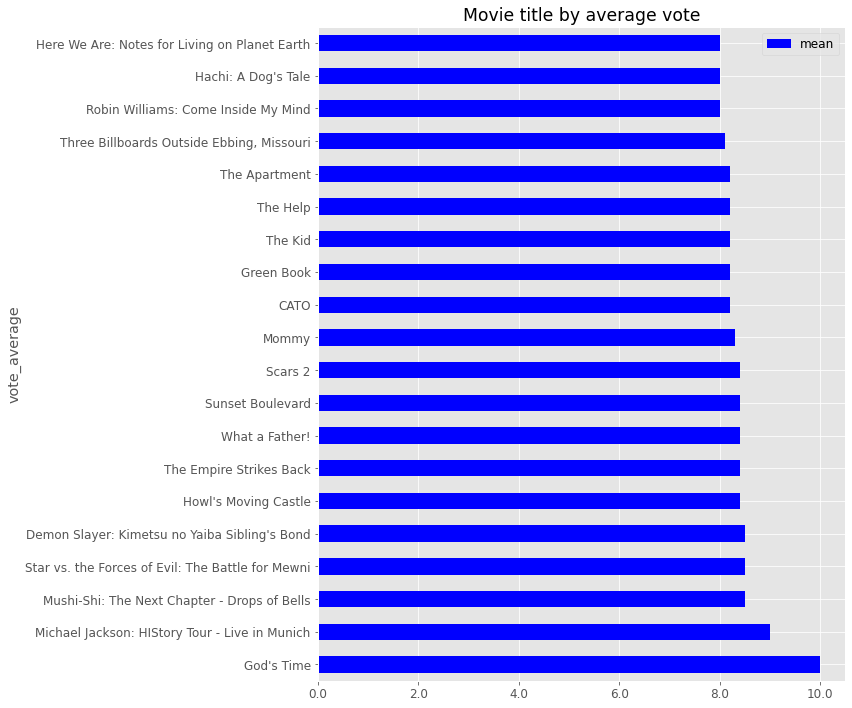

In [32]:
ax3 = df_vot_avg.plot(
  kind='barh',
  grid=True,
  xlabel='vote_average', ylabel='title', title='Movie title by average vote',
  color='blue'
)

ax3.xaxis.set_major_formatter(original)

# Movies With Release Date

In [33]:
page_number = []
adult = []
id = []
original_language = []
popularity = []
poster_path = []
release_date = []
title = []
vote_average = []
vote_count = []

for pg in popular_movies[:52]:
  pg_num = page_number.append(pg['page']) 
  adt = adult.append(pg['results'][0]['adult']) 
  ids = id.append(pg['results'][0]['id']) 
  orig_lang = original_language.append(pg['results'][0]['original_language']) 
  pop = popularity.append(pg['results'][0]['popularity']) 
  post_path = poster_path.append(pg['results'][0]['poster_path']) 
  rel_date = release_date.append(pg['results'][0]['release_date']) 
  tit = title.append(pg['results'][0]['title']) 
  vot_avg = vote_average.append(pg['results'][0]['vote_average']) 
  vot_cnt = vote_count.append(pg['results'][0]['vote_count']) 

In [34]:
data1 = {
  'page_number': page_number,
  'adult': adult,
  'id': id,
  'original_language': original_language,
  'popularity': popularity,
  'poster_path': poster_path,
  'release_date': release_date,
  'title': title,
  'vote_average': vote_average,
  'vote_count': vote_count
}

df1 = pd.DataFrame(data=data1)
df1.head()

,page_number,adult,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,1,False,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777
1,2,False,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55
2,3,False,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,2022-04-01,Dakota,6.0,7
3,4,False,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30
4,5,False,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,2022-02-09,What a Father!,8.4,74


In [35]:
# drop page number and adult columns
df1.drop(columns=['page_number', 'adult'], inplace=True)
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count
0,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777
1,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55
2,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,2022-04-01,Dakota,6.0,7
3,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30
4,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,2022-02-09,What a Father!,8.4,74


In [36]:
df1.shape

(52, 8)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52 non-null     int64  
 1   original_language  52 non-null     object 
 2   popularity         52 non-null     float64
 3   poster_path        52 non-null     object 
 4   release_date       52 non-null     object 
 5   title              52 non-null     object 
 6   vote_average       52 non-null     float64
 7   vote_count         52 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ KB


In [38]:
pd.value_counts(df1.dtypes)

object     4
int64      2
float64    2
dtype: int64

In [39]:
df1['id'] = df1['id'].astype('category')                        # convert id to categorical            
df1['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 52 entries, 0 to 51
Series name: id
Non-Null Count  Dtype   
--------------  -----   
52 non-null     category
dtypes: category(1)
memory usage: 2.6 KB


In [40]:
df1['release_date'] = pd.to_datetime(df1['release_date'])       # convert release date to datetime
df1.dtypes

id                         category
original_language            object
popularity                  float64
poster_path                  object
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [41]:
df1['year'] = df1['release_date'].dt.year                       # extract year
df1['month'] = df1['release_date'].dt.month                     # extract month
df1['day'] = df1['release_date'].dt.day                         # extract day
df1['day_name'] = df1['release_date'].dt.day_name()             # extract day name
df1['week'] = df1['release_date'].dt.week                       # extract week
df1['quarter']= df1['release_date'].dt.quarter                  # extract quarter

df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777,2022.0,4.0,6.0,Wednesday,14.0,2.0
1,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55,2022.0,4.0,21.0,Thursday,16.0,2.0
2,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,2022-04-01,Dakota,6.0,7,2022.0,4.0,1.0,Friday,13.0,2.0
3,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30,2022.0,1.0,17.0,Monday,3.0,1.0
4,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,2022-02-09,What a Father!,8.4,74,2022.0,2.0,9.0,Wednesday,6.0,1.0


In [42]:
df1['year'] = np.int64(df1['year'])                             # change year to integer data type
df1.head()

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter
0,338953,en,3521.980,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-04-06,Fantastic Beasts: The Secrets of Dumbledore,6.9,1777,2022,4.0,6.0,Wednesday,14.0,2.0
1,756681,es,1110.247,/luMC56bwZqaECYRz6X7sXjqN6nd.jpg,2022-04-21,Veneciafrenia,5.4,55,2022,4.0,21.0,Thursday,16.0,2.0
2,955740,en,570.656,/j3eUOPUoDwkupwTPTDk6ESqrzGt.jpg,2022-04-01,Dakota,6.0,7,2022,4.0,1.0,Friday,13.0,2.0
3,928270,en,526.913,/AeeXeyiiPOyybnjSnJoSTixOZQq.jpg,2022-01-17,Heatwave,7.4,30,2022,1.0,17.0,Monday,3.0,1.0
4,937337,es,403.419,/IkdBm3dDA11pNFlbkLcU5WdESn.jpg,2022-02-09,What a Father!,8.4,74,2022,2.0,9.0,Wednesday,6.0,1.0


In [43]:
df1.describe(exclude='number')

,id,original_language,poster_path,release_date,title,day_name
count,52.0,52,52,51,52,51
unique,52.0,7,52,50,52,7
top,863.0,en,/jrgifaYeUtTnaH7NF5Drkgjg2MB.jpg,2022-03-25 00:00:00,Fantastic Beasts: The Secrets of Dumbledore,Friday
freq,1.0,39,1,2,1,17
first,NaN,NaN,NaN,1998-11-25 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2022-06-21 00:00:00,NaN,NaN


In [44]:
df1.drop(columns=['year', 'month', 'day',	'week', 'quarter']).describe(include='number')

,popularity,vote_average,vote_count
count,52.000000,52.000000,52.000000
mean,226.522154,6.428846,2821.538462
std,496.977973,1.595378,4045.109182
min,62.781000,0.000000,0.000000
25%,79.782250,5.925000,74.750000
50%,104.140000,6.800000,489.500000
75%,159.247250,7.400000,5734.500000
max,3521.980000,8.500000,15763.000000


<AxesSubplot:xlabel='popularity', ylabel='Density'>

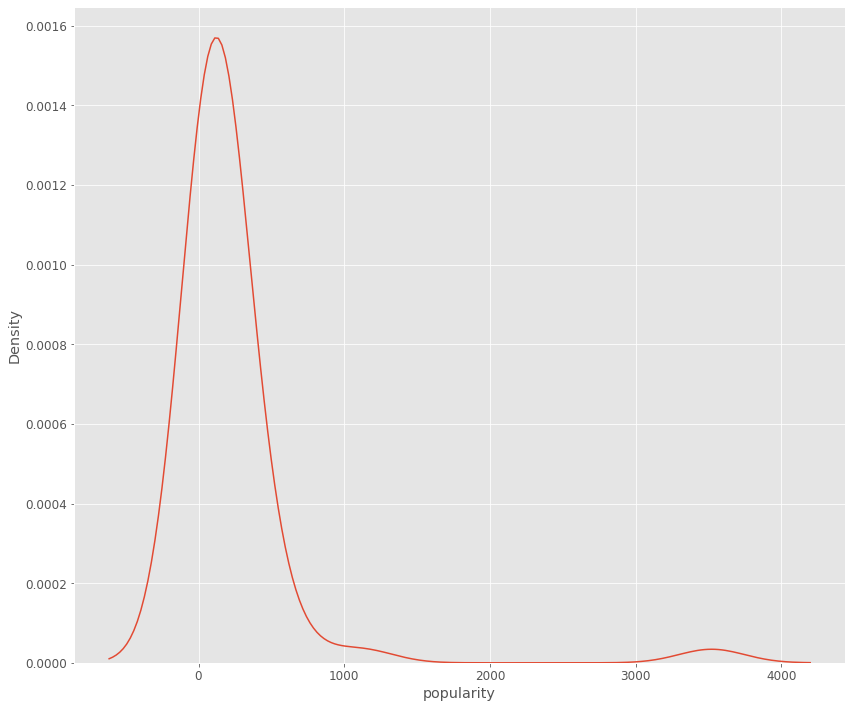

In [45]:
plotkde(data=df1, x='popularity')

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

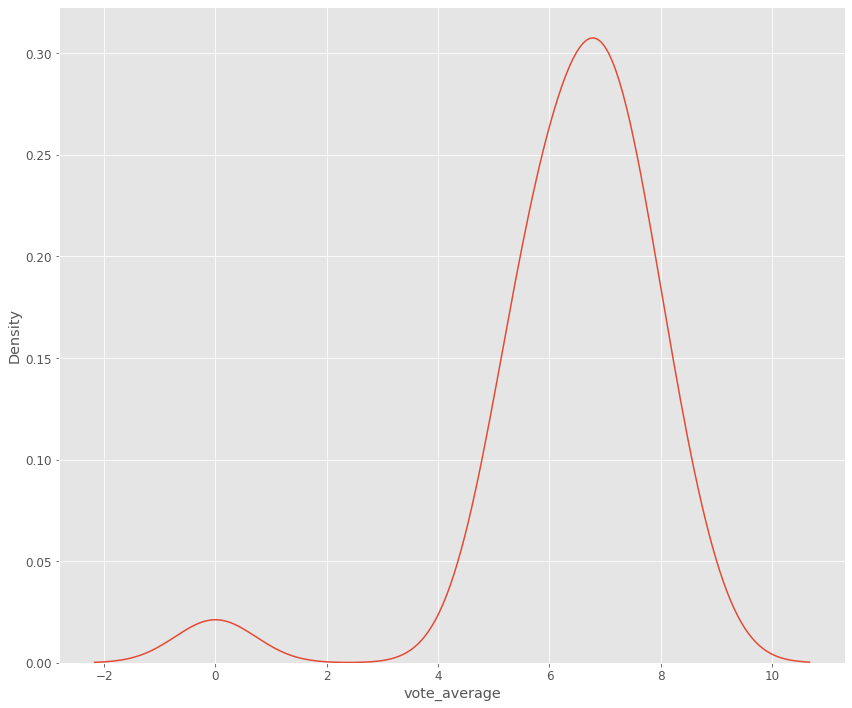

In [46]:
plotkde(data=df1, x='vote_average')

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

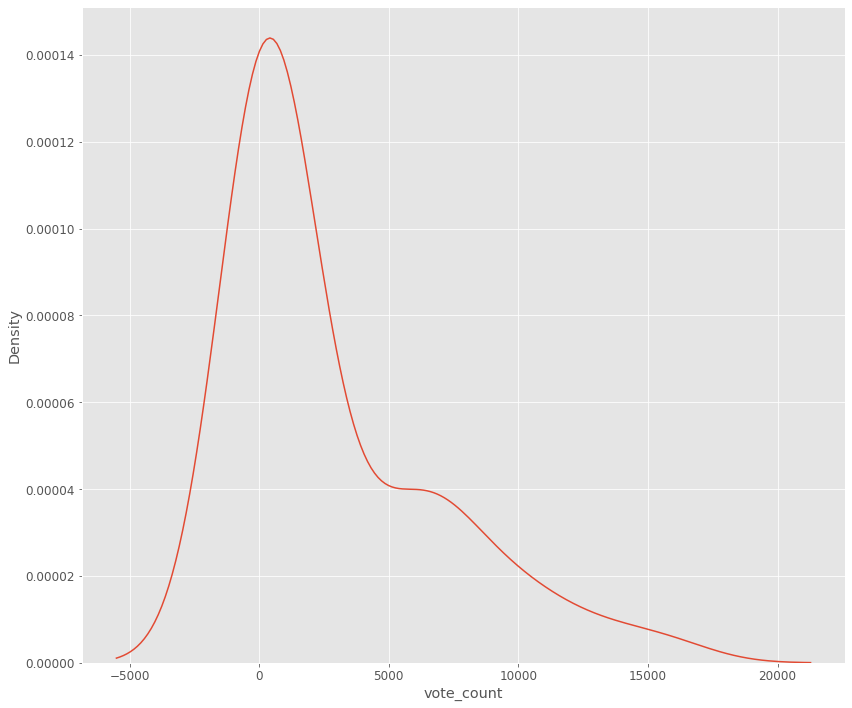

In [47]:
plotkde(data=df1, x='vote_count')

# Missing Values Exploration

In [48]:
df1.isna().sum()

id                   0
original_language    0
popularity           0
poster_path          0
release_date         1
title                0
vote_average         0
vote_count           0
year                 0
month                1
day                  1
day_name             1
week                 1
quarter              1
dtype: int64

<AxesSubplot:>

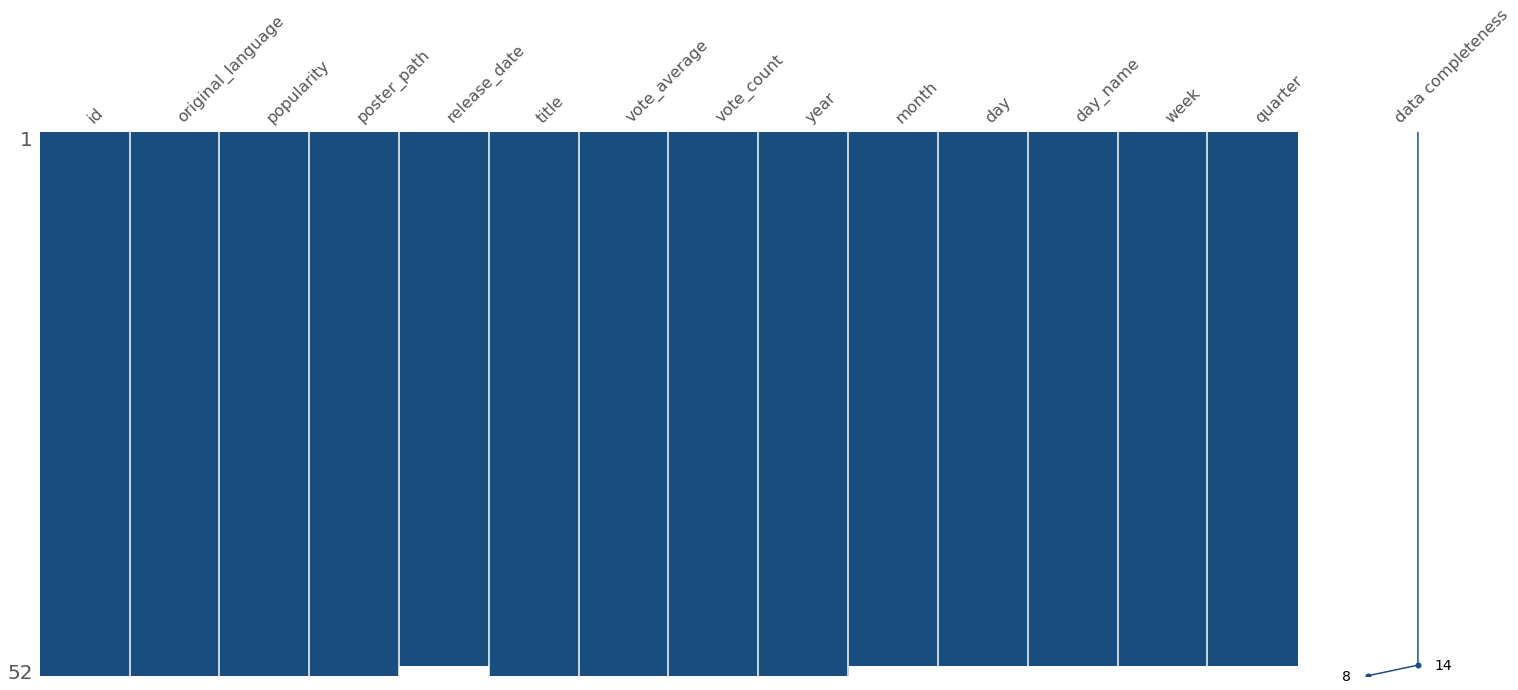

In [49]:
msno.matrix(df1, labels=True, sort='descending', color=(0.1, 0.3, 0.5))

In [50]:
df1.duplicated().sum()                                # check for duplicates

0

In [51]:
df1.loc[df.duplicated(subset=['id'])]                 # check where id is duplicated

,id,original_language,popularity,poster_path,release_date,title,vote_average,vote_count,year,month,day,day_name,week,quarter


[Text(0.5, 1.0, 'Count of unique original language')]

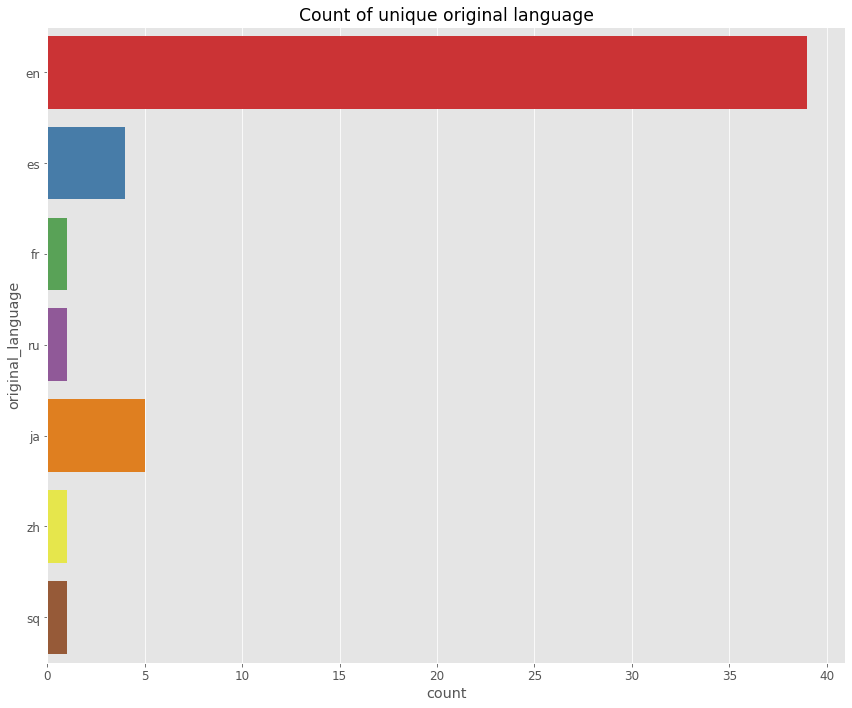

In [52]:
ax4 = sns.countplot(
  data=df1,
  y='original_language', palette='Set1',
)

ax4.set(title='Count of unique original language')

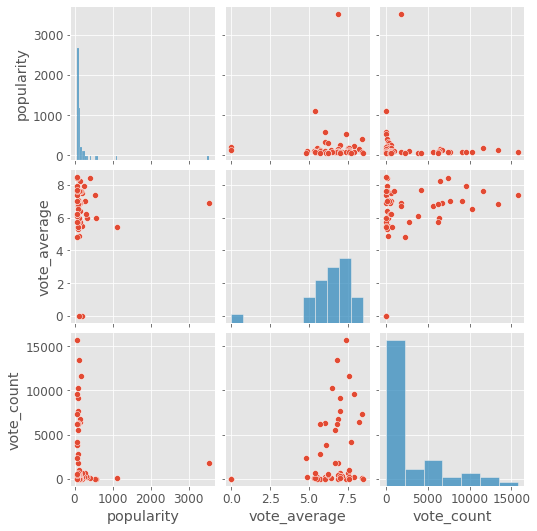

In [53]:
sns.pairplot(df1[['popularity', 'vote_average', 'vote_count']])

In [54]:
df_corr1 = df1[['popularity', 'vote_average', 'vote_count']].corr()
df_corr1

,popularity,vote_average,vote_count
popularity,1.000000,0.018515,-0.119594
vote_average,0.018515,1.000000,0.259942
vote_count,-0.119594,0.259942,1.000000


<AxesSubplot:>

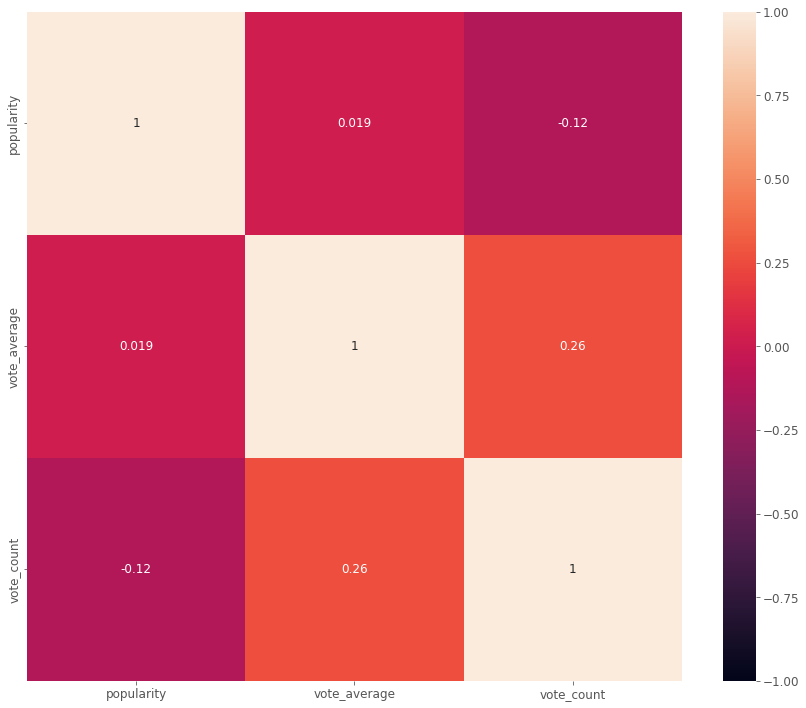

In [55]:
sns.heatmap(df_corr1, annot=True, vmin=-1, vmax=1)

# Data Grouping and Aggregation

In [56]:
# find top ten years with the highest movie popularity
df1_grp_pop_yr = df1.groupby('year') \
  .agg(np.sum)['popularity'] \
  .sort_values(ascending=False) \
  .head(10)

df1_grp_pop_yr

year
 2022                   7283.754
 2021                   1471.686
 2011                    473.695
 2020                    412.497
 2019                    341.234
 2012                    267.707
 2010                    263.338
-9223372036854775808     203.638
 1999                    174.473
 2013                    159.819
Name: popularity, dtype: float64

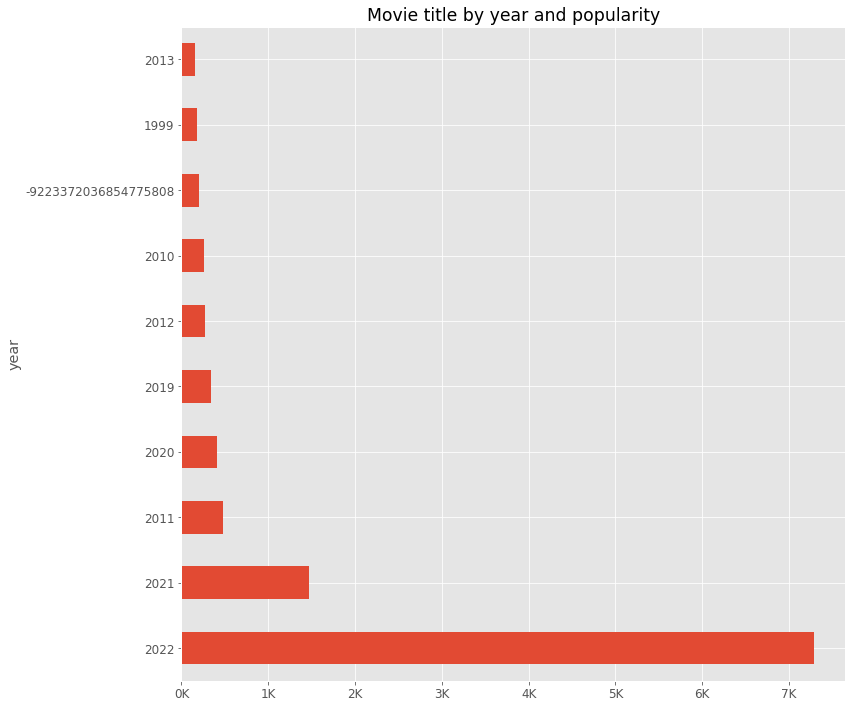

In [57]:
ax5 = df1_grp_pop_yr.plot(
  kind='barh',
  grid=True,
  ylabel='year', title='Movie title by year and popularity'
)

ax5.xaxis.set_major_formatter(thousand)

In [58]:
# find top ten years with the highest movie count
df1.groupby('year') \
  .agg(np.sum)['vote_count'] \
  .sort_values(ascending=False) \
  .head(10)

year
2011    25037
2004    16939
2014    15886
2012    13788
2018    13396
1999    11657
2013    11429
2016    10019
1998     7704
2015     6257
Name: vote_count, dtype: int64

In [59]:
# find top ten years with the highest average vote
df1.groupby('year') \
  .agg(np.mean)['vote_average'] \
  .sort_values(ascending=False) \
  .head(10)

year
2004    8.150
1999    7.600
2010    7.250
2014    7.200
2020    7.075
1998    7.000
2011    6.950
2019    6.875
2015    6.800
2018    6.800
Name: vote_average, dtype: float64